In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
debussy_file = "drive/My Drive/Colab Notebooks/piano_c.wav"

In [ ]:
ipd.Audio(debussy_file)

In [ ]:
# load audio files with librosa
debussy, sr = librosa.load(debussy_file)

**Windowing in time domain**
The simplest way to analyze a signal is in its raw form. For time series signals (signals that evolve with time), windowing allows us to view a short time segment of a longer signal and analyze its frequency content. Mathematically, windowing can be seen as multiplying a signal with a window function that is zero everywhere on the given signal except on the region of interest.



As the window slides over the signal in time, the size is made adaptive by changing according to characteristics of the audio signal. One problem with this is the abrupt changes or jump discontinuities in its shape at the edges of the window. The distortion is the result of the Gibbs phenomenon.

In [ ]:
pip install essentia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 14.5 MB/s eta 0:00:00


**Availabe Window Functions**

**Rectangular Window:**
Simplest window, often used when no smoothing is needed.
Impulse-like response, leading to poor frequency resolution.

**Hann Window:**
Balances between main lobe width and side-lobe suppression.
Provides better frequency resolution than the rectangular window.

**Hamming Window:**
Similar to Hann but with different weighting.
Improved side-lobe suppression compared to Hann.

**Blackman Window:**
Offers a good compromise between main lobe width and side-lobe levels.
Suitable for applications where minimizing side lobes is crucial.

**Triangular Window (Bartlett):**
Linearly ramps up and down, forming a triangular shape.
Wider main lobe compared to Hann and Hamming.

**Bartlett Window:**
Similar to the triangular window but with a different weighting scheme.
Provides a compromise between rectangular and triangular windows.

**Kaiser Window:**

Controlled by a shape parameter (beta).
Allows customization of the trade-off between main lobe width and side-lobe suppression.

**Gaussian Window:**
Shaped like a Gaussian distribution.
Controlled by the standard deviation (std) parameter.

**Flat Top Window:**
Designed to have a flat top in the frequency domain.
Suitable for precise frequency analysis with low side-lobe levels.

In [ ]:
from essentia.standard import Windowing
from scipy import signal

w_essentia = Windowing(type='hann')  # specify window function in essentia
w_scipy = signal.get_window('triang', 7)  # apply window function in scipy
w_librosa = signal.get_window('hamm', 7)  # apply window function in librosa

In [ ]:
w_essentia

<essentia.standard._create_essentia_class.<locals>.Algo at 0x7eeccdd6f1c0>

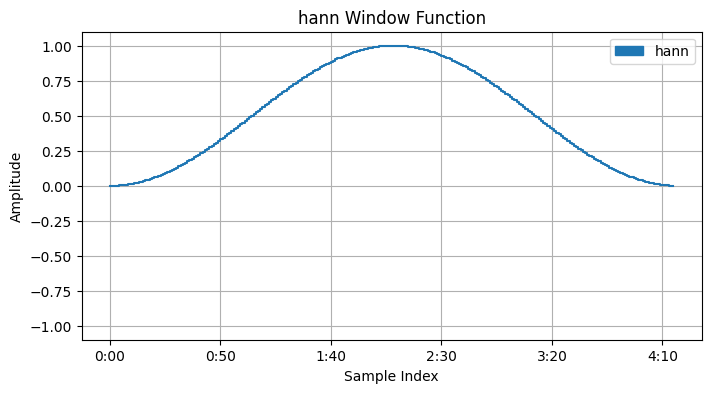

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Define parameters
window_length = 256  # Adjust the length based on your needs
window_type = 'hann'  # Choose the window function

# Generate the window function
window = signal.get_window(window_type, window_length)

# Plot the window function
plt.figure(figsize=(8, 4))
librosa.display.waveshow(window, sr=1.0, label=window_type)
plt.title(f'{window_type} Window Function')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


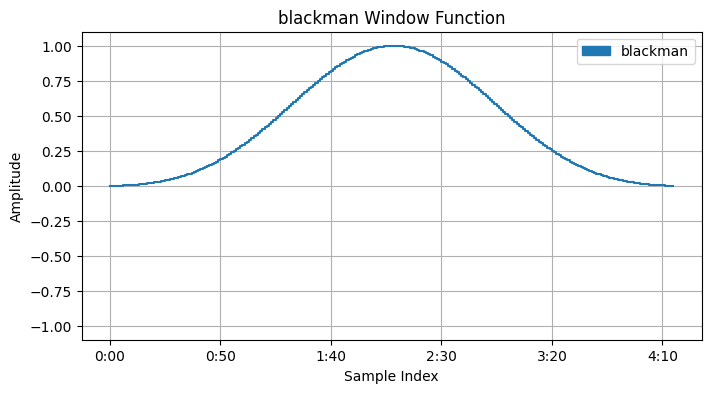

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Define parameters
window_length = 256  # Adjust the length based on your needs
window_type = 'blackman'  # Choose the window function

# Generate the window function
window = signal.get_window(window_type, window_length)

# Plot the window function
plt.figure(figsize=(8, 4))
librosa.display.waveshow(window, sr=1.0, label=window_type)
plt.title(f'{window_type} Window Function')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

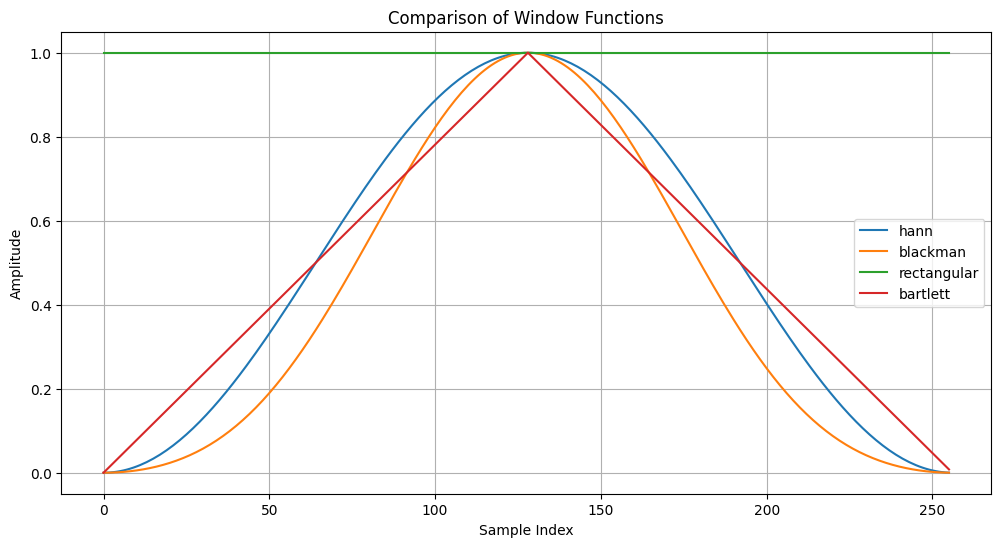

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define parameters
window_length = 256  # Adjust the length based on your needs
window_types = ['hann', 'blackman','rectangular','bartlett']  # Choose the window functions

# Generate x-axis values (sample indices)
x = np.arange(window_length)

# Plot the window functions
plt.figure(figsize=(12, 6))
for window_type in window_types:
    window = signal.get_window(window_type, window_length)
    plt.plot(x, window, label=window_type)

plt.title('Comparison of Window Functions')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


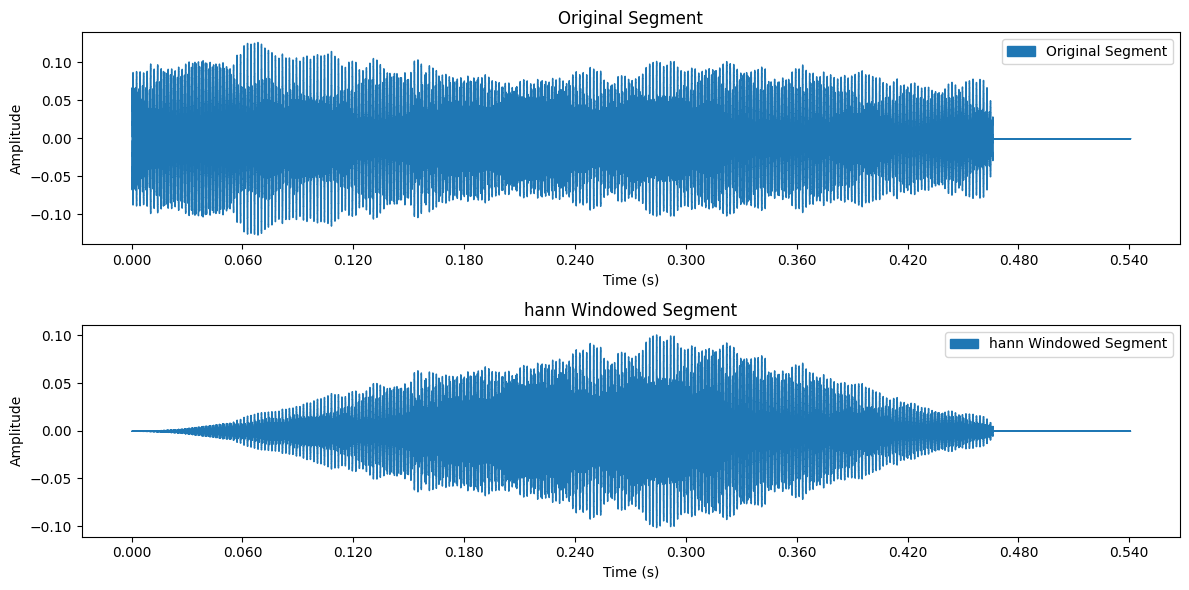

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal

# Load an audio file
y, sr = librosa.load(debussy_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'hann'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


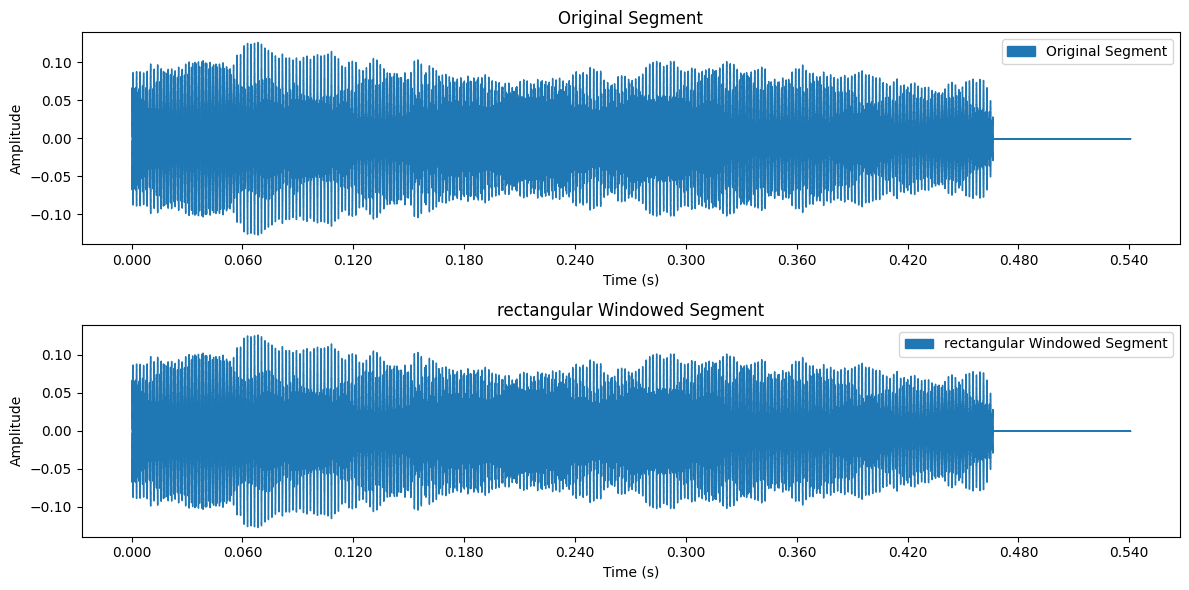

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal

# Load an audio file
y, sr = librosa.load(debussy_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'rectangular'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


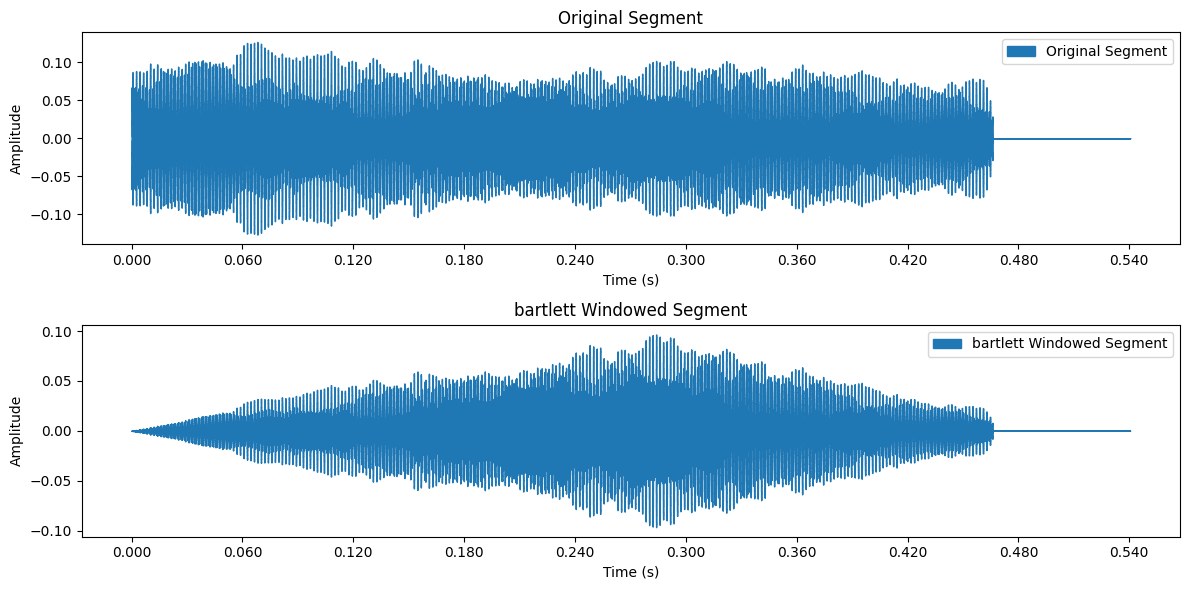

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy import signal

# Load an audio file
y, sr = librosa.load(debussy_file)

# Choose a segment of the audio
start_time = 1  # start time in seconds
duration = 2     # duration in seconds
y_segment = y[int(start_time * sr):int((start_time + duration) * sr)]

# Apply a window function (e.g., Hann) to the segment
window_type = 'bartlett'
window = signal.get_window(window_type, len(y_segment))
y_windowed = y_segment * window

# Plot the original and windowed signals
plt.figure(figsize=(12, 6))

# Plot the original segment
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_segment, sr=sr, label='Original Segment')
plt.title('Original Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

# Plot the windowed segment
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_windowed, sr=sr, label=f'{window_type} Windowed Segment')
plt.title(f'{window_type} Windowed Segment')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

**Root-mean-squared energy with Librosa**
Root Mean Square (RMS) energy is a measure commonly used in audio signal processing to quantify the energy content of a signal. In the context of audio, RMS energy is often used to describe the average power of a signal over a certain time window.

Here's a brief overview of how RMS energy is calculated for an audio signal:

Square the Values: Take each sample of the audio signal and square it. This is done to eliminate any negative values and to emphasize the magnitudes of the samples.

Calculate the Mean: Find the average (mean) of the squared values obtained in step 1.

Take the Square Root: Finally, take the square root of the mean calculated in step 2. This is the RMS value.

RMS energy is often used as a measure of the overall loudness or energy level of a signal. It is more stable than the raw amplitude values and is useful in applications like audio processing, compression, and normalization.

In the context of audio processing, RMS energy can be computed over short time intervals to provide a time-varying measure of energy. This can be useful in tasks such as audio analysis, where you might want to identify changes in energy levels over time, for instance, in speech or music signal processing.

Keep in mind that the choice of time window for calculating RMS energy is important and depends on the specific application. Shorter windows capture more rapid changes in energy, while longer windows provide a more smoothed-out measure over time. https://www.gstatic.com/education/formulas2/553212783/en/root_mean_square.svg

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [ ]:
rms_debussy = librosa.feature.rms(y=debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(y=redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(y=duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
frames1 = range(len(rms_debussy))
t1 = librosa.frames_to_time(frames1, hop_length=HOP_LENGTH)

frames2 = range(len(rms_redhot))
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)

frames3 = range(len(rms_duke))
t3 = librosa.frames_to_time(frames3, hop_length=HOP_LENGTH)

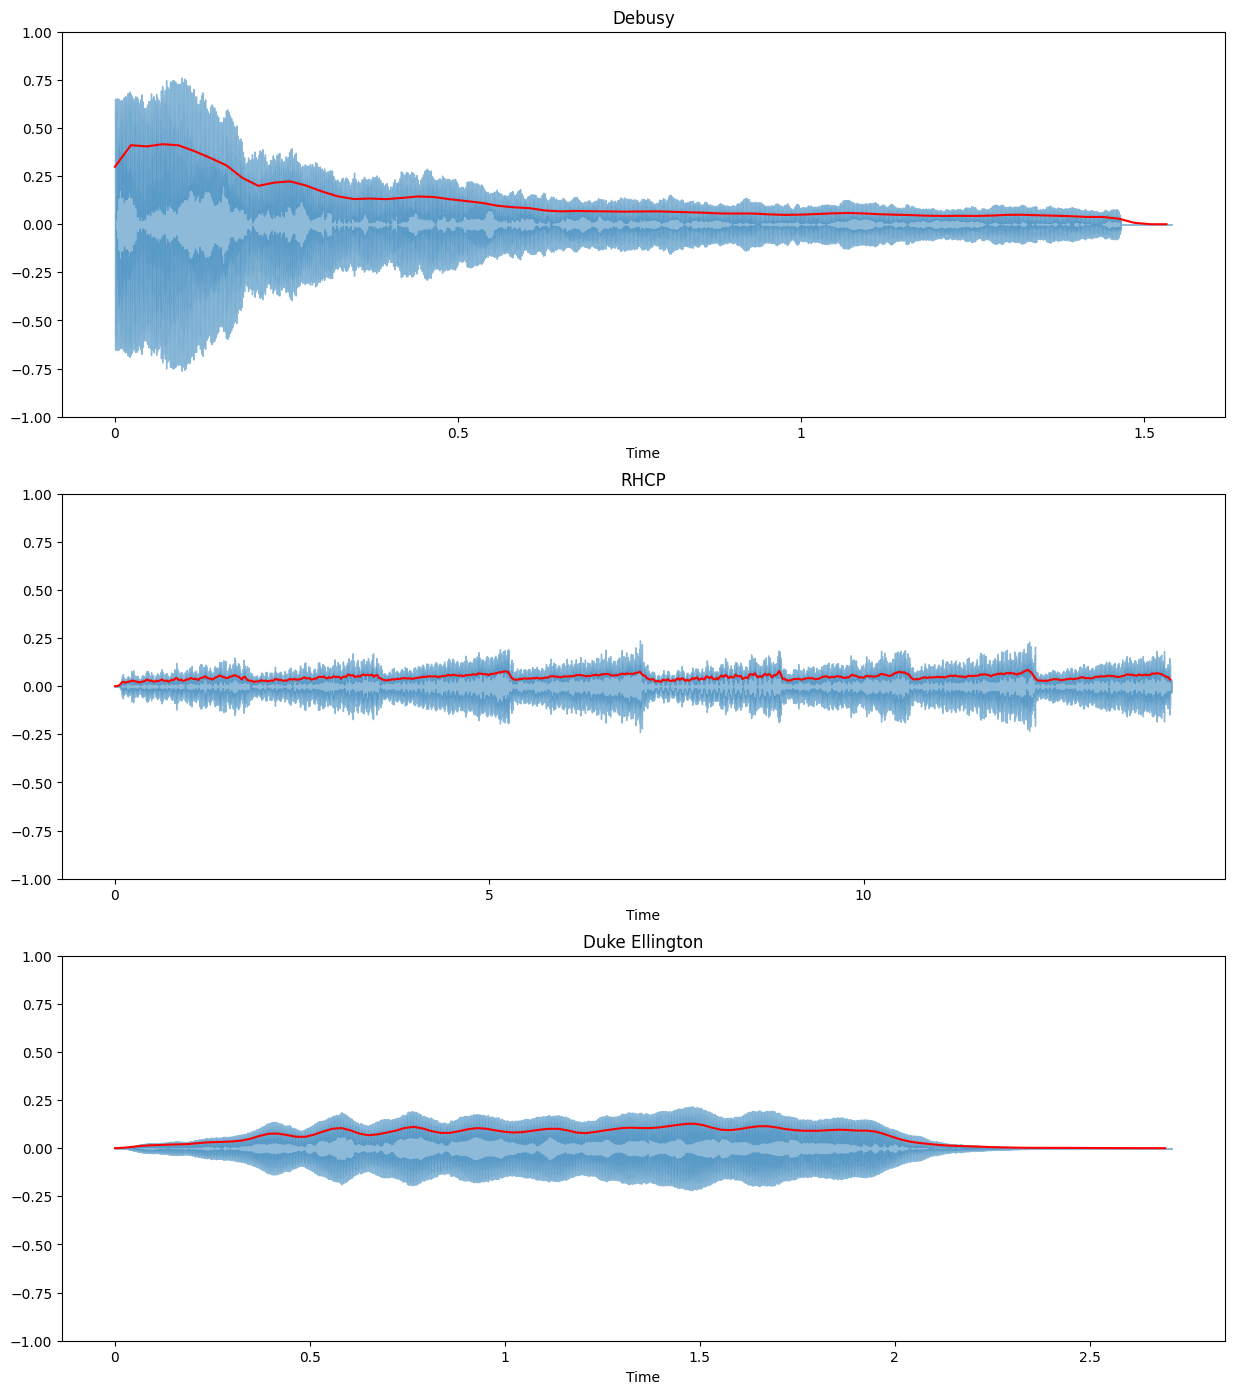

In [ ]:
# rms energy is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t1, rms_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t2, rms_redhot, color="r")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t3, rms_duke, color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

**RMSE from scratch**

In [ ]:
def rmse(signal, frame_size, hop_length):
    rmse = []

    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length):
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

In [ ]:
rms_debussy1 = rmse(debussy, FRAME_SIZE, HOP_LENGTH)
rms_redhot1 = rmse(redhot, FRAME_SIZE, HOP_LENGTH)
rms_duke1 = rmse(duke, FRAME_SIZE, HOP_LENGTH)

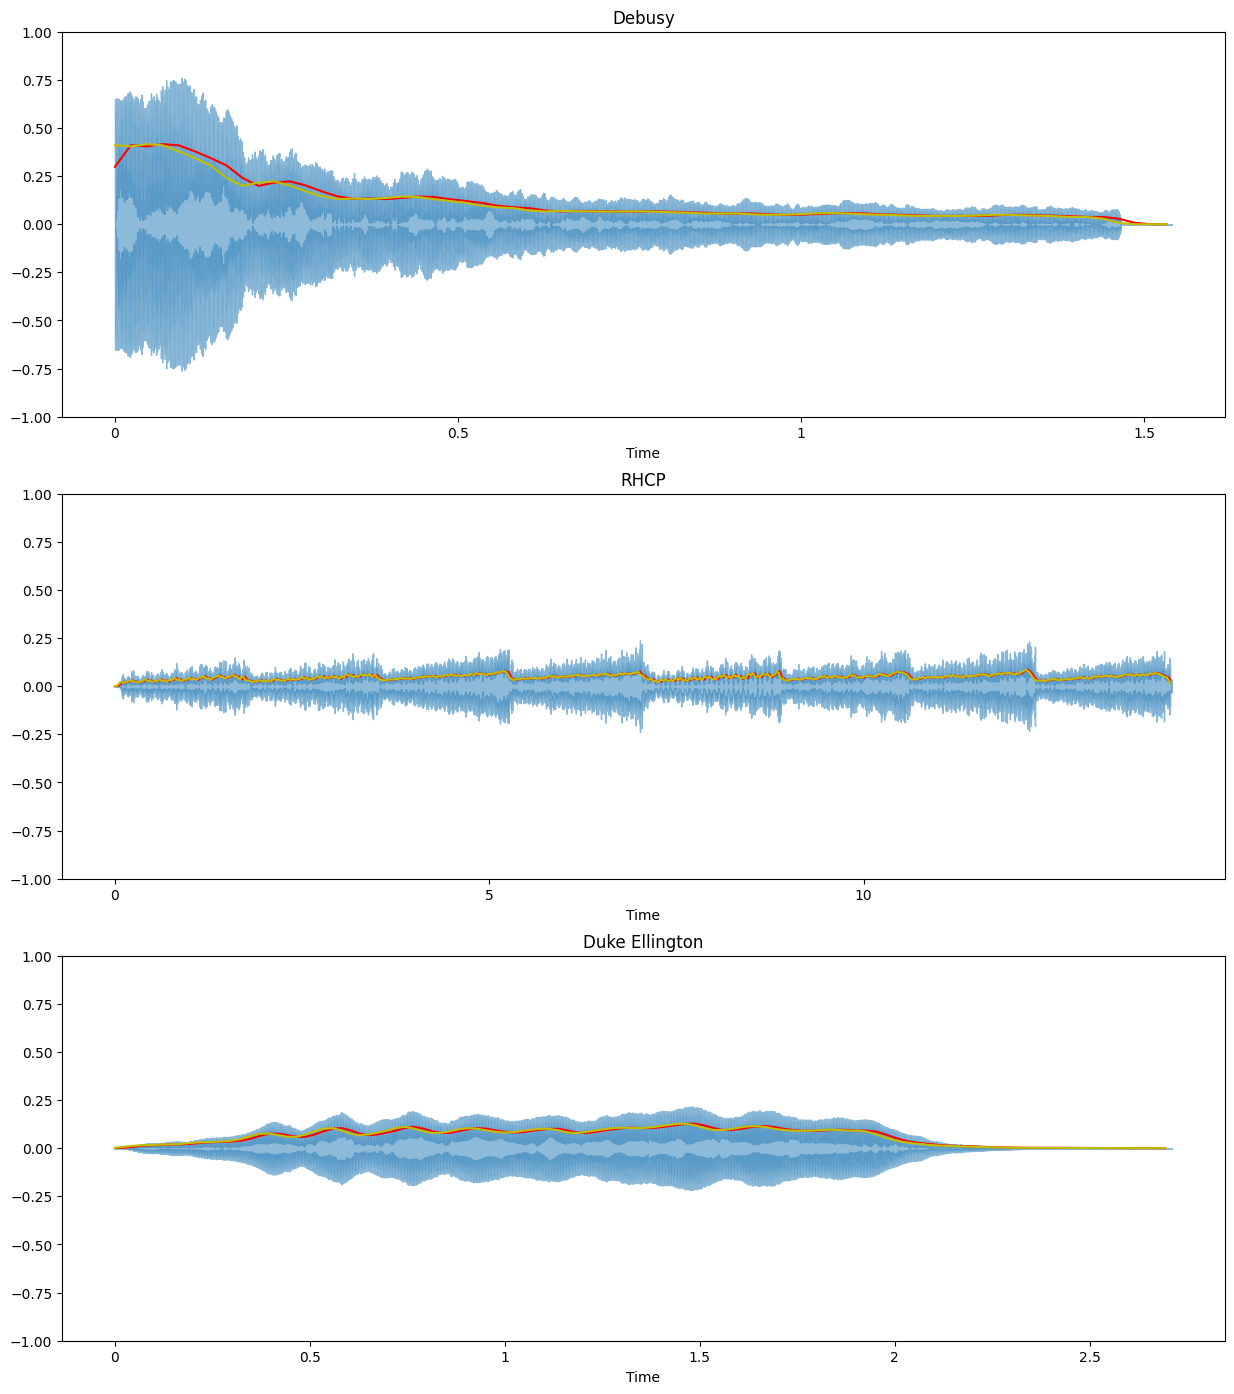

In [ ]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t1, rms_debussy, color="r")
plt.plot(t1, rms_debussy1, color="y")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t2, rms_redhot, color="r")
plt.plot(t2, rms_redhot1, color="y")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t3, rms_duke, color="r")
plt.plot(t3, rms_duke1, color="y")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

**Zero-crossing rate with Librosa**

Zero Crossing Rate (ZCR) is a feature commonly used in audio signal processing to analyze the rate at which a signal changes its sign. It is particularly useful in tasks such as speech and music analysis. The zero crossing rate is a measure of how often the signal changes its direction, i.e., from positive to negative or vice versa.

The zero crossing rate is calculated by counting the number of times the signal crosses the zero axis within a specified time frame. Here's a basic outline of how you can compute the ZCR for an audio signal:

Frame the Signal: Divide the audio signal into overlapping frames. Each frame typically consists of a fixed number of samples.

Count Zero Crossings: For each frame, count the number of times the signal crosses the zero axis.

Calculate the Zero Crossing Rate: Divide the total number of zero crossings by the total number of frames or by the total duration of the signal.

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkqfxCQ9Z6az2X71T74hOUvDLrn4Dx4NFhka2e2PvAbw&s

In [ ]:
zcr_debussy = librosa.feature.zero_crossing_rate(debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

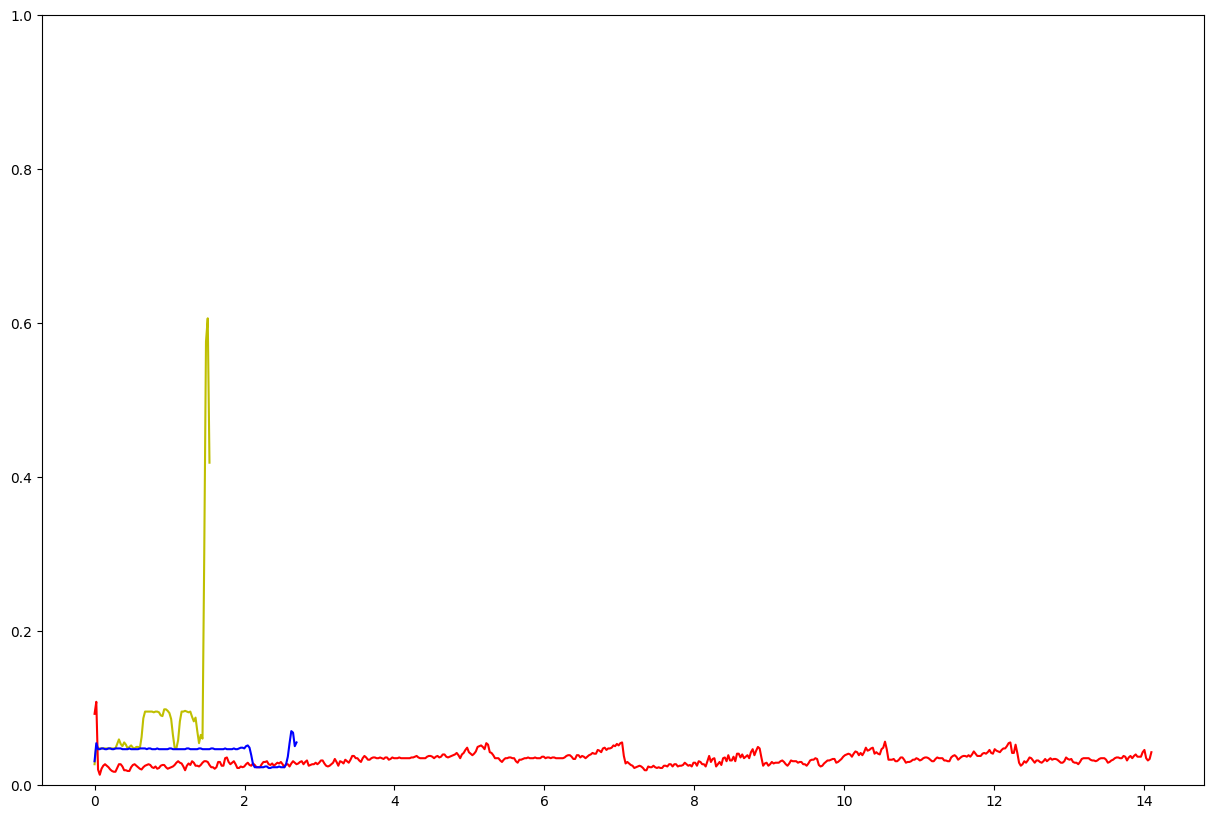

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(t1, zcr_debussy, color="y")
plt.plot(t2, zcr_redhot, color="r")
plt.plot(t3, zcr_duke, color="b")
plt.ylim(0, 1)
plt.show()

## ZCR: Voice vs Noise

In [ ]:
# get ZCR
zcr_voice = librosa.feature.zero_crossing_rate(debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_noise = librosa.feature.zero_crossing_rate(redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
frames = range(len(zcr_voice))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

frames2 = range(len(zcr_noise))
t2 = librosa.frames_to_time(frames2, hop_length=HOP_LENGTH)

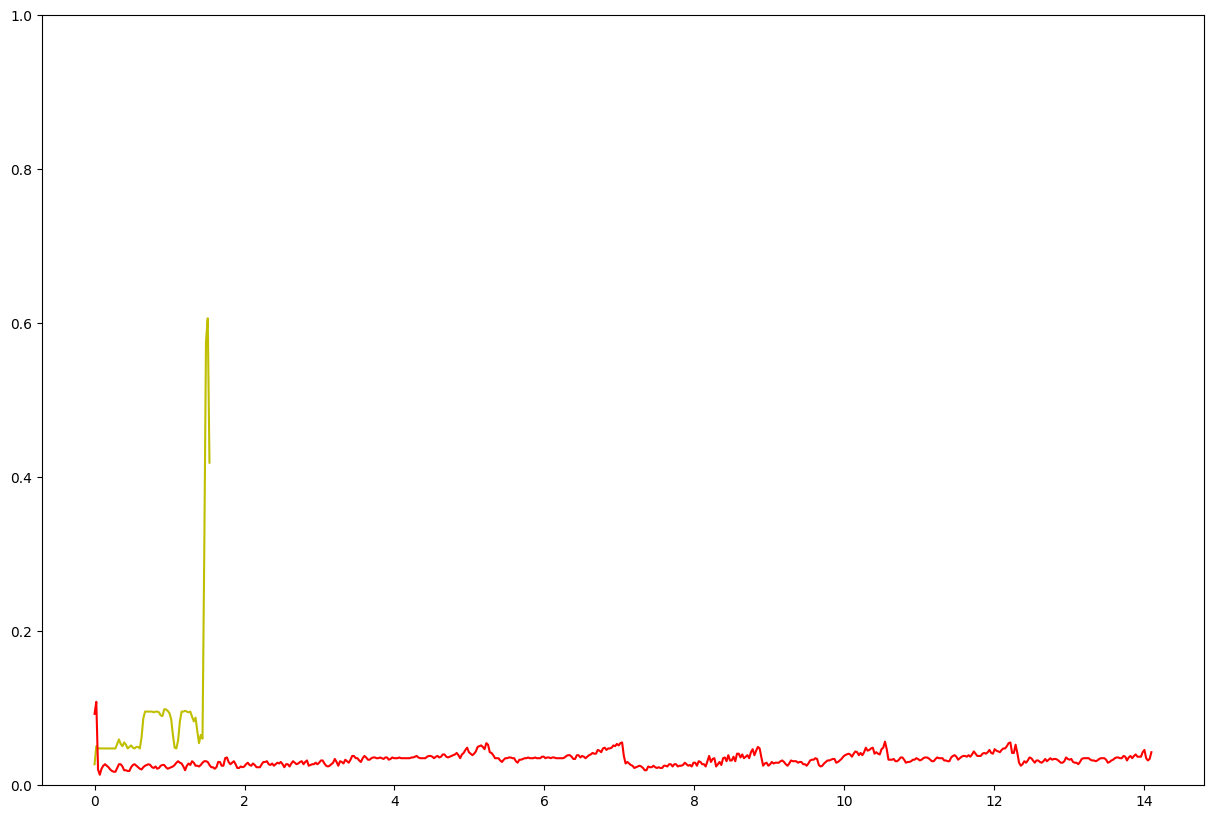

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_voice, color="y")
plt.plot(t2, zcr_noise, color="r")
plt.ylim(0, 1)
plt.show()

**Short-Time Energy (STE)**
The energy throughout a raw sound signal is variable and it is difficult, therefore, to accurately characterize the energy of a signal. For this, the short time energy, which is the energy from a frame, is calculated. With similar applications to ZCRs, STE is used to detect voiced-unvoiced segments, aid in music onset detection, and discriminate between source types (music, environmental, speech).


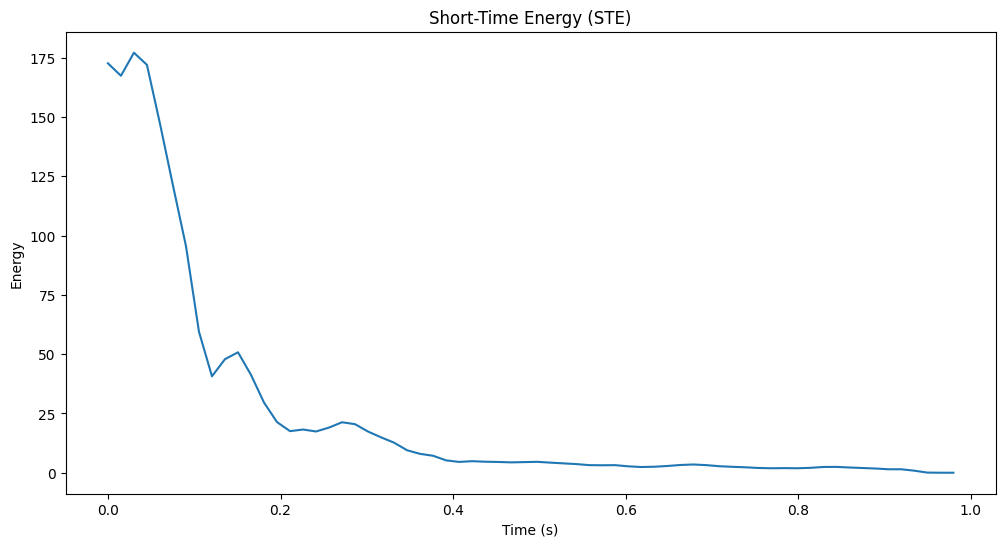

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from essentia.standard import Windowing, FrameGenerator

def calculateSTE(audio_signal, window_type, frame_length, hop_size):
    signal_new = []  # container for signal square
    win = Windowing(type=window_type)  # instantiate window function

    # compute signal square by frame
    for frame in FrameGenerator(audio_signal, frameSize=frame_length, hopSize=hop_size, startFromZero=True):
        frame_new = frame**2
        signal_new.append(frame_new)

    # output the sum of squares (STE) for each frame
    return np.sum(signal_new, axis=1)

# Example usage and plotting
audio_signal, _ = librosa.load(debussy_file)

window_type = 'hann'
frame_length = 1024
hop_size = 512

ste_values = calculateSTE(audio_signal, window_type, frame_length, hop_size)

# Plot the Short-Time Energy
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(ste_values)) * hop_size / len(audio_signal), ste_values)
plt.title('Short-Time Energy (STE)')
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.show()


**Separation of Harmonic & Percussive Signals**
On a very coarse level, many sounds can be categorized as either of the harmonic or percussive sound class. Harmonic sounds are sounds we perceive to have a specific pitch, whereas percussive sounds are often perceived as the result of two colliding objects. Percussive sounds tend to have a clear localization in time moreso than a particular pitch. More granular sound classes can be classified by its harmonic-percussive components ratio. For example, a note played on the piano has a percussive onset (marked by the hammer hitting the strings) preceding a harmonic tone (the result of the vibrating string).

The value of mapping both the time and phase content of a signal in distinguishing between harmonic and percussive components, makes the STFT spectral representation important. The time-frequency bin of the STFT for harmonic component of an input signal is expected to look more horizontal than vertical/time-dependent structure that is a percussive component.

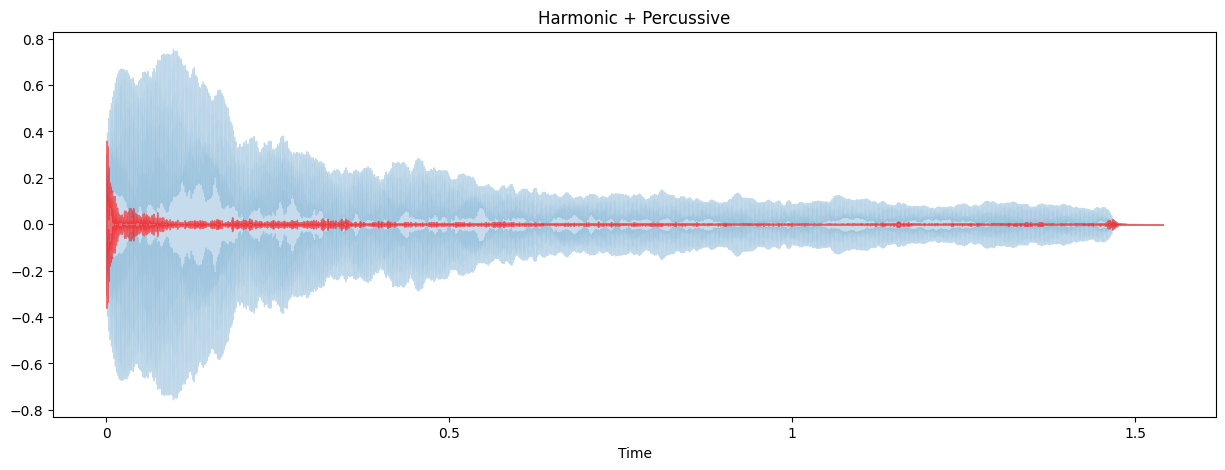

In [ ]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='red', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.show()

**Beat Extraction**
Particularly useful features to extract from musical sources may be an approximation of tempo as well as the beat onset indices, an array of frame numbers corresponding to beat events.

<ipython-input-51-d5007ed90cd4>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=beat_nums, y=beat_time_diff, palette="rocket", ax=ax)


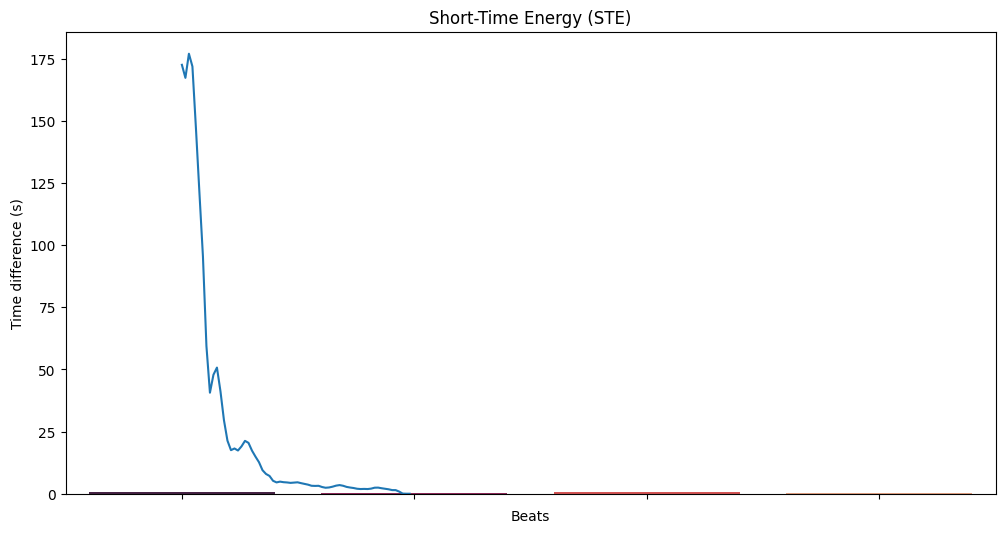

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from essentia.standard import Windowing, FrameGenerator

def calculateSTE(audio_signal, window_type, frame_length, hop_size):
    signal_new = []  # container for signal square
    win = Windowing(type=window_type)  # instantiate window function

    # compute signal square by frame
    for frame in FrameGenerator(audio_signal, frameSize=frame_length, hopSize=hop_size, startFromZero=True):
        frame_new = frame**2
        signal_new.append(frame_new)

    # output the sum of squares (STE) for each frame
    return np.sum(signal_new, axis=1)

audio_signal, _ = audio_signal, _ = librosa.load(debussy_file)

window_type = 'hann'
frame_length = 1024
hop_size = 512

ste_values = calculateSTE(audio_signal, window_type, frame_length, hop_size)

# Plot the Short-Time Energy using seaborn
plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, len(ste_values)) * hop_size / len(audio_signal), ste_values)
plt.title('Short-Time Energy (STE)')
plt.xlabel('Time (s)')
plt.ylabel('Energy')

# Example seaborn barplot
beat_nums = [1, 2, 3, 4]
beat_time_diff = [0.5, 0.3, 0.7, 0.4]

ax = plt.gca()
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")

# Use barplot correctly
g = sns.barplot(x=beat_nums, y=beat_time_diff, palette="rocket", ax=ax)
g.set(xticklabels=[])
plt.show()
